In [1]:
import pandas as pd

from preprocess import preprocess_profiles

### List plates with overlapping ORFs

See https://github.com/jump-cellpainting/jump-cellpainting/issues/78#issuecomment-805942281

In [2]:
JCP_OVERLAP_PLATES = [
    "OKA05.06.07.08.A",
    "OAB84.85.86.87.A",
    "OAA97.98.99.XX.A",
    "OAB25.26.27.28.A",
    "OAB41.OAC17.OAB78.79.A",
    "OAA49.59.79.80.A",
    "OAA58.60.61.62.A",
    "OAA85.86.87.88.A",
    "OAB13.14.15.16.A",
    "OAB33.34.35.36.A",
    "OAB37.38.39.40.A",
]

### Read profiles

In [3]:
ann_df = pd.read_parquet("output/raw_filtered_profiles.parquet")
ann_df

,Metadata_JCP2022,Metadata_broad_sample,Metadata_Name,Metadata_Vector,Metadata_Transcript,Metadata_Symbol,Metadata_NCBI_Gene_ID,Metadata_Taxon_ID,Metadata_Gene_Description,Metadata_Prot_Match,...,Nuclei_Texture_Variance_RNA_10_03_256,Nuclei_Texture_Variance_RNA_3_00_256,Nuclei_Texture_Variance_RNA_3_01_256,Nuclei_Texture_Variance_RNA_3_02_256,Nuclei_Texture_Variance_RNA_3_03_256,Nuclei_Texture_Variance_RNA_5_00_256,Nuclei_Texture_Variance_RNA_5_01_256,Nuclei_Texture_Variance_RNA_5_02_256,Nuclei_Texture_Variance_RNA_5_03_256,Metadata_Batch
0,JCP2022_900002,ccsbBroad304_00001,ORF008415.1_TRC304.1,pLX_304,NM_001160173.3,NAT1,9,9606,N-acetyltransferase 1,100.0,...,82.875999,76.996002,77.473999,76.582001,77.233002,78.186996,80.055000,77.632004,79.955002,2021_06_21_Batch7
1,JCP2022_900011,ccsbBroad304_00013,ORF009063.1_TRC304.1,pLX_304,NM_001612.6,ACRV1,56,9606,acrosomal vesicle protein 1,100.0,...,93.607002,88.196999,89.211998,88.081001,89.154999,89.897003,92.719002,89.843002,92.597000,2021_06_21_Batch7
2,JCP2022_900033,ccsbBroad304_00037,ORF015627.1_TRC304.1,pLX_304,NM_001136.5,AGER,177,9606,advanced glycosylation end-product specific re...,100.0,...,133.380005,126.150002,127.250000,125.769997,127.250000,128.429993,131.880005,127.940002,131.960007,2021_06_21_Batch7
3,JCP2022_900063,ccsbBroad304_00069,ORF005433.1_TRC304.1,pLX_304,NM_001153.5,ANXA4,307,9606,annexin A4,100.0,...,84.871002,80.910004,81.814003,80.850998,81.926003,82.567001,85.179001,82.646004,85.292999,2021_06_21_Batch7
4,JCP2022_900084,ccsbBroad304_00091,ORF014376.1_TRC304.1,pLX_304,NM_001651.4,AQP5,362,9606,aquaporin 5,100.0,...,91.669998,87.241997,87.132004,86.538002,87.476997,88.224998,90.223000,87.663002,90.227997,2021_06_21_Batch7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79555,JCP2022_915131,ccsbBroad304_99994,ORFC00004.1_TRC304.1,pLX_304,LacZ.1,LacZ,LacZ,CONTROL,Hahn Lab LacZ,100.0,...,71.441002,66.777000,67.111000,66.614998,66.950996,67.466003,69.115997,67.341003,69.023003,2021_08_30_Batch13
79556,JCP2022_915131,ccsbBroad304_99994,ORFC00004.1_TRC304.1,pLX_304,LacZ.1,LacZ,LacZ,CONTROL,Hahn Lab LacZ,100.0,...,76.763000,72.568001,73.039001,72.873001,73.301003,73.550003,75.428001,73.696999,75.563004,2021_08_30_Batch13
79557,JCP2022_915131,ccsbBroad304_99994,ORFC00004.1_TRC304.1,pLX_304,LacZ.1,LacZ,LacZ,CONTROL,Hahn Lab LacZ,100.0,...,91.638000,86.575996,87.012001,86.803001,87.361000,87.459999,89.482002,87.972000,90.033997,2021_08_30_Batch13
79558,JCP2022_915131,ccsbBroad304_99994,ORFC00004.1_TRC304.1,pLX_304,LacZ.1,LacZ,LacZ,CONTROL,Hahn Lab LacZ,100.0,...,47.766998,45.113998,45.214001,45.137001,45.473999,45.556000,46.622002,45.544998,46.728001,2021_08_30_Batch13


#### Keep only overlap plates

In [4]:
ann_df = ann_df[ann_df["Metadata_plate_map_name"].isin(JCP_OVERLAP_PLATES)]

Text(0.05986522488638144, 5, '0.060')

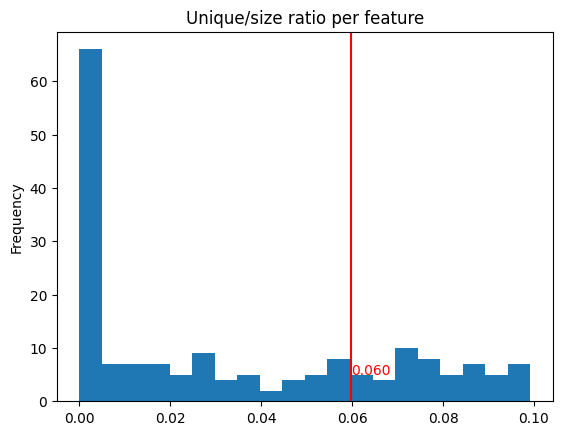

In [5]:
from matplotlib import pyplot as plt

unique_ratio = ann_df.nunique() / ann_df.shape[0]
unique_ratio[unique_ratio < 0.1].plot(
    kind="hist", bins=20, title="Unique/size ratio per feature"
)
plt.axvline(x=unique_ratio["Cells_Count"], color="red")
plt.text(
    unique_ratio["Cells_Count"], 5, f"{unique_ratio['Cells_Count']:.3f}", color="red"
)

### Save subset profiles

In [6]:
ann_df.to_parquet("output/subset_profiles.parquet", index=False)

### Preprocess subset features

In [7]:
ann_df = preprocess_profiles(ann_df)
ann_df.shape

(19143, 614)

### Save processed subset profiles

In [8]:
ann_df.to_parquet("output/subset_processed_profiles.parquet", index=False)